# Laboratorio 1 por Francisco Rodríguez

##  Github: https://github.com/FranciscoRodRam

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.iteso.mx/documents/27014/202031/Logo-ITESO-MinimoV.png" width="300px" height="400px" />




# Predicción de precios de Commodities por medio de Simulación Montecarlo

#### Importando librerias y funciones que utilizaremos para la predicción del precio de Commodities por medio de Simulación Montecarlo

In [6]:
import funciones as fn                              # Para procesamiento de datos
import visualizaciones as vs                        # Para visualizacion de datos
import pandas as pd                                 # Procesamiento de datos
from datos import OA_Ak                             # Importar token para API de OANDA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import datetime as dt
from scipy import stats
from matplotlib import pyplot
import statsmodels.api as sm
import seaborn as sns
from seaborn import distplot

#### En este caso estaremos utilizando el precio histórico de petróleo crudo de Brent en Estados Unidos, los cuales los obtenemos de Oanda por medio de la siguiente función

In [83]:
# token de OANDA
OA_In = "BCO_USD"                  # Instrumento
OA_Gn = "D"                        # Granularidad de velas
fini = pd.to_datetime("2018-02-18 00:00:00").tz_localize('GMT')  # Fecha inicial
ffin = pd.to_datetime("2020-02-18 00:00:00").tz_localize('GMT')  # Fecha final

# Descargar precios masivos
df_pe =  pd.DataFrame(fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,
                             p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900))


### Visualización del precio del maíz en Gráfica de Velas

In [48]:
vs_grafica1 = vs.g_velas(p0_de=df_pe.iloc[0:283, :])
vs_grafica1.show()


### Promedio móvil : Promedios calculados a partir de subgrupos artificiales de observaciones consecutivas

In [85]:
df_pe['Promedio movil'] = df_pe['Close'].rolling(3).mean()

### Gráfica del promedio móvil

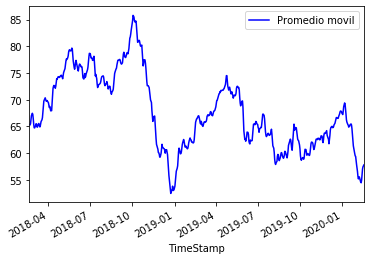

In [86]:
Color = ["blue"]
Linestyle = ["-"]
df_pe.plot(x='TimeStamp',y='Promedio movil',color=Color,style=Linestyle)
plt.show()

### Calculado el rendimiento diario del activo

In [87]:
df_pe['Rendimiento'] = df_pe['Close'].astype(float).pct_change()

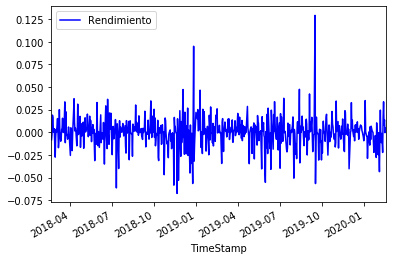

In [88]:
Color = ["blue"]
Linestyle = ["-"]
df_pe.plot(x='TimeStamp',y='Rendimiento',color=Color,style=Linestyle)
plt.show()

## Visualizando los datos

In [89]:
df_pe

,TimeStamp,Open,High,Low,Close,Promedio movil,Rendimiento
0,2018-02-18 21:00:00+00:00,65.456,66.018,65.141,65.726,NaN,NaN
1,2018-02-19 21:00:00+00:00,65.723,65.925,64.892,65.192,NaN,-0.008125
2,2018-02-20 21:00:00+00:00,65.189,65.629,64.504,65.040,65.319333,-0.002332
3,2018-02-21 21:00:00+00:00,65.040,66.641,64.719,66.282,65.504667,0.019096
4,2018-02-22 21:00:00+00:00,66.285,67.452,65.910,67.363,66.228333,0.016309
...,...,...,...,...,...,...,...
612,2020-02-11 21:00:00+00:00,54.640,56.680,54.526,56.486,54.962000,0.033785
613,2020-02-12 21:00:00+00:00,56.489,57.235,55.359,56.929,56.018333,0.007843
614,2020-02-13 21:00:00+00:00,56.929,57.911,56.540,57.718,57.044333,0.013859
615,2020-02-14 21:00:00+00:00,57.718,57.787,57.504,57.701,57.449333,-0.000295


### Calculo del rendimiento promedio diario y el promedio de la volatilidad diaria

In [90]:
mu=df_pe['Rendimiento'].mean() #Rendimiento diario
v=df_pe['Rendimiento'].var(ddof=0)
sigma= np.sqrt(v) #Volatilidad diaria 

### Resultados diarios

In [91]:
mu,sigma

(-5.906843224159277e-05, 0.017024125247244466)

### Resultados anualizados 

In [92]:
mu*252,sigma*252

(-0.014885244924881379, 4.290079562305605)

In [93]:
 re=df_pe['Rendimiento'].dropna() #Para eliminar valores vacíos o NA

### Prueba de de normalidad por JB

In [94]:
sm.stats.stattools.jarque_bera(re, axis=0)

(1575.0662942685897, 0.0, 0.4446915826126508, 10.783008212936153)

#### Que de acuerdo con la prueba de JB se rechaza Ho, es decir no existe normalidad en los datos.  
 

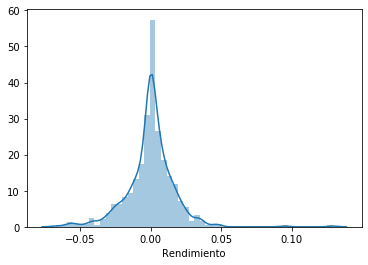

In [95]:
distplot(re)
plt.show()

In [96]:
epsilon = np.random.normal(mu, sigma, len(df_pe));
dt = 1
so=df_pe['Close'].astype(float)

In [97]:
precio = so*np.exp((mu-.5*sigma**2)*dt+sigma*np.sqrt(dt)*epsilon)

### Se realizan simulaciones del total de días transcurridos de la fecha inicial al día de hoy del precio del commoditie

In [98]:
precio

0      65.709078
1      65.142633
2      65.032697
3      66.272885
4      67.347055
         ...    
612    56.463260
613    56.885168
614    57.722492
615    57.686874
616    57.971070
Name: Close, Length: 617, dtype: float64

In [99]:
#Promedio del precio estimado 
so_estimado =[precio.mean()]
#El valor mínimo del precio estimado 
Linf=[min(precio)]
#EL valor máximo del precio estimado
Lsup=[max(precio)]

In [100]:
# DataFrame para mostrar el resultado de las simulaciones
df = pd.DataFrame({"Limite inferior": Linf, "Limite superior": Lsup,"Precio_estimado":so_estimado})

In [101]:
df

,Limite inferior,Limite superior,Precio_estimado
0,50.441245,86.539276,67.641248
